In [60]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        


/kaggle/input/online-game-dataset/Online_game.csv


The data here represents a total of 16598 online games with various amounts of information on each of them. Some of them including the name, the year it was released, the platform the game was released, the genre of the game, the company publisher, and the sales in specific regions.

In [61]:
df = pd.read_csv('/kaggle/input/online-game-dataset/Online_game.csv')

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

So as we see there are many values in the dataset that are not filled in, specifically for the year and publisher.

# Unique values

In [18]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

These are all the unique platforms that are present in the data and also all the unique genres that are present in the data.

In [22]:
df['Genre'].value_counts()


Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [8]:
df['Platform'].value_counts().head()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64

From this we can see that the most played genre of game are action games and the the platform with the most games is the DS.

In [70]:
df['Year'].value_counts().head(7)

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
Name: count, dtype: int64

As seen above, the years that produced the most games are years close to and above 2004, which correlates with the previous data. The DS was released in 2004 and according to the previous data it was the most popular platform, so it makes sense to see that games above and around that time would be in more production.


# Null values

In [35]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

        Rank                             Name Platform    Year         Genre  \
179      180                  Madden NFL 2004      PS2     NaN        Sports   
377      378                 FIFA Soccer 2004      PS2     NaN        Sports   
431      432       LEGO Batman: The Videogame      Wii     NaN        Action   
470      471       wwe Smackdown vs. Raw 2006      PS2     NaN      Fighting   
607      608                   Space Invaders     2600     NaN       Shooter   
...      ...                              ...      ...     ...           ...   
16427  16430                     Virtua Quest       GC     NaN  Role-Playing   
16493  16496                       The Smurfs      3DS     NaN        Action   
16494  16497  Legends of Oz: Dorothy's Return      3DS  2014.0        Puzzle   
16543  16546           Driving Simulator 2011       PC  2011.0        Racing   
16553  16556                   Bound By Flame     X360  2014.0  Role-Playing   

                                    Pub

There are clearly a lot of null values in the dataset.

In [21]:
df['Year'].fillna('Unknown', inplace=True)
mask = df['Year'] == 'Unknown'
 
dfNew = pd.DataFrame(df[mask])
 
print(dfNew)

df['Publisher'].fillna('Unknown', inplace=True)
mask = df['Publisher'] == 'Unknown'
 
dfNew1 = pd.DataFrame(df[mask])
 
print(dfNew1)

        Rank                         Name Platform     Year         Genre  \
179      180              Madden NFL 2004      PS2  Unknown        Sports   
377      378             FIFA Soccer 2004      PS2  Unknown        Sports   
431      432   LEGO Batman: The Videogame      Wii  Unknown        Action   
470      471   wwe Smackdown vs. Raw 2006      PS2  Unknown      Fighting   
607      608               Space Invaders     2600  Unknown       Shooter   
...      ...                          ...      ...      ...           ...   
16307  16310                Freaky Flyers       GC  Unknown        Racing   
16327  16330                    Inversion       PC  Unknown       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan      PS3  Unknown     Adventure   
16427  16430                 Virtua Quest       GC  Unknown  Role-Playing   
16493  16496                   The Smurfs      3DS  Unknown        Action   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales

/tmp/ipykernel_37/1723773411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna('Unknown', inplace=True)
/tmp/ipykernel_37/1723773411.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Year'].fillna('Unknown', inplace=True)
/tmp/ipykernel_37/1723773411.py:8: FutureWarning: A value is trying to be set on a copy of a DataFram

In [37]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


There are no more null values in the dataset now.


# Sales

In [76]:

ser = pd.Series(df['Global_Sales'].values,df['Name'])
ser.sort_values(ascending=False)

Name
Wii Sports                              82.74
Super Mario Bros.                       40.24
Mario Kart Wii                          35.82
Wii Sports Resort                       33.00
Pokemon Red/Pokemon Blue                31.37
                                        ...  
BattleForge                              0.01
Jewel Quest II                           0.01
Toro to Morimori                         0.01
Sonic & All-Stars Racing Transformed     0.01
Spirits & Spells                         0.01
Length: 16598, dtype: float64

In [69]:
ser = pd.Series(df['NA_Sales'].values,df['Name'])
ser.sort_values(ascending=False)

Name
Wii Sports                          41.49
Super Mario Bros.                   29.08
Duck Hunt                           26.93
Tetris                              23.20
Mario Kart Wii                      15.85
                                    ...  
Jikkyou Powerful Pro Yakyuu 2012     0.00
Theatrhythm Dragon Quest             0.00
Countdown: The Game                  0.00
Kanuchi: Shiroki Tsubasa no Shou     0.00
RPG Tsukuru 2                        0.00
Length: 16598, dtype: float64

In [68]:
ser = pd.Series(df['EU_Sales'].values,df['Name'])
ser.sort_values(ascending=False)

Name
Wii Sports                                  29.02
Mario Kart Wii                              12.88
Wii Sports Resort                           11.01
Nintendogs                                  11.00
Grand Theft Auto V                           9.27
                                            ...  
Winning Post 4 Maximum                       0.00
World Soccer Winning Eleven 9 (US sales)     0.00
Satisfashion                                 0.00
Attack on Titan (KOEI)                       0.00
Spirits & Spells                             0.00
Length: 16598, dtype: float64

In [77]:
ser = pd.Series(df['JP_Sales'].values,df['Name'])
ser.sort_values(ascending=False)

Name
Pokemon Red/Pokemon Blue             10.22
Pokemon Gold/Pokemon Silver           7.20
Super Mario Bros.                     6.81
New Super Mario Bros.                 6.50
Pokemon Diamond/Pokemon Pearl         6.04
                                     ...  
Cloudy With a Chance of Meatballs     0.00
MotoGP 08                             0.00
Madden NFL 12                         0.00
Ford vs. Chevy                        0.00
Spirits & Spells                      0.00
Length: 16598, dtype: float64

As seen above, Wii Sports has had the most sales globally, in North America, and Europe. Mario Kart Wii is also in the top five rows of each global, NA, and EU sales. Japan Sales is the most different with the Pokemon games being the most popular in the region.

In [22]:
ser = pd.Series(df['Global_Sales'].values,df['Genre'])
ser.sort_values(ascending=False)

Genre
Sports          82.74
Platform        40.24
Racing          35.82
Sports          33.00
Role-Playing    31.37
                ...  
Strategy         0.01
Puzzle           0.01
Misc             0.01
Racing           0.01
Platform         0.01
Length: 16598, dtype: float64

Here we can see that the most played genre of game is sports games including games like FIFA, Madden, NBA 2K and others. This is because of the amount of sports games that are made every year.

In [35]:
df[df['Name'].str.contains('FIFA')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
121,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
...,...,...,...,...,...,...,...,...,...,...,...
13611,13613,FIFA Soccer 2003 (weekly jp sales),PS2,2002.0,Sports,Electronic Arts,0.00,0.00,0.04,0.00,0.04
13851,13853,FIFA World Cup Germany 2006,DS,2006.0,Sports,Electronic Arts,0.03,0.00,0.00,0.00,0.04
14251,14254,FIFA World Cup: Germany 2006,GBA,2006.0,Sports,Electronic Arts,0.02,0.01,0.00,0.00,0.03
15205,15208,FIFA Soccer 09,PC,2008.0,Sports,Electronic Arts,0.00,0.02,0.00,0.00,0.02


In [36]:
df[df['Name'].str.contains('Madden')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
211,212,Madden NFL 06,PS2,2005.0,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91
238,239,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
240,241,Madden NFL 07,PS2,2006.0,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49
279,280,Madden NFL 2003,PS2,2002.0,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14
...,...,...,...,...,...,...,...,...,...,...,...
11653,11655,Madden NFL 08,GC,2007.0,Sports,Electronic Arts,0.06,0.02,0.00,0.00,0.08
11704,11706,Madden NFL 17,PS3,2016.0,Sports,Electronic Arts,0.05,0.01,0.00,0.01,0.08
11980,11982,John Madden Football,SNES,1991.0,Sports,Imagineer,0.00,0.00,0.07,0.00,0.07
14814,14817,Madden NFL 07,GBA,2006.0,Sports,Electronic Arts,0.02,0.01,0.00,0.00,0.03


In [42]:
df[df['Name'].str.contains('NBA')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
314,315,NBA 2K16,PS4,2015.0,Sports,Take-Two Interactive,2.48,0.65,0.03,0.69,3.85
468,469,NBA 2K13,X360,2012.0,Sports,Take-Two Interactive,2.60,0.21,0.01,0.19,3.00
534,535,NBA Street,PS2,2001.0,Sports,Electronic Arts,2.19,0.22,0.00,0.38,2.79
584,585,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16,2.62
591,592,NBA Live 2005,PS2,2004.0,Sports,Electronic Arts,2.03,0.21,0.00,0.35,2.59
...,...,...,...,...,...,...,...,...,...,...,...
14573,14576,NBA 08,PSP,2007.0,Sports,Sony Computer Entertainment,0.03,0.00,0.00,0.00,0.03
14724,14727,NBA 2K7,XB,2006.0,Sports,Take-Two Interactive,0.02,0.01,0.00,0.00,0.03
14957,14960,NBA Starting Five,XB,2002.0,Sports,Konami Digital Entertainment,0.02,0.01,0.00,0.00,0.02
15672,15675,NBA 07,PS2,2006.0,Sports,Sony Computer Entertainment,0.01,0.01,0.00,0.00,0.02


From this we can clearly see that there are hundreds of sports games even just for one series of games, the most common examples including FIFA(Soccer), Madden(Football), and NBA2k(Basketball), with 142, 98, and 191 rows, respectively. 

# What is the total sales for each genre?

In [13]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)


Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

As we can see Action has the highest sales, so what is the top 10 games in action?

In [25]:
df[df['Genre']=='Action'].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24


# What is the total sales for each company?

In [12]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)


Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

As we can see Nintendo has the highest sales, so what is the top 10 games in Nintendo?


In [26]:
df[df['Publisher']=='Nintendo'].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# What are the total sales for each year?

In [16]:
df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).head(20)


Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
2011.0    515.99
2005.0    459.94
2004.0    419.31
2002.0    395.52
2013.0    368.11
2012.0    363.54
2003.0    357.85
2014.0    337.05
2001.0    331.47
2015.0    264.44
1998.0    256.47
1999.0    251.27
2000.0    201.56
1997.0    200.98
1996.0    199.15
Name: Global_Sales, dtype: float64

As we can see 2008 had the highest sales, so what is the top 10 games in 2008?


In [28]:
df[df['Year']==2008.0].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
88,89,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37
118,119,Gears of War 2,X360,2008.0,Shooter,Microsoft Game Studios,4.15,1.92,0.06,0.64,6.76
144,145,Metal Gear Solid 4: Guns of the Patriots,PS3,2008.0,Action,Konami Digital Entertainment,2.63,1.74,0.83,0.83,6.03
148,149,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92
161,162,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50


# What are the total sales for each platform?

In [22]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)


Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

As we can see the PS2 had the highest sales, so what is the top 10 games on the PS2?


In [29]:
df[df['Platform']=='PS2'].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
86,87,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05
104,105,Need for Speed Underground,PS2,2003.0,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20
113,114,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90
114,115,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83
131,132,Kingdom Hearts,PS2,2002.0,Role-Playing,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40


# What game has the most sales in each genre?

In [8]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [12]:
def ranker(df):
    df['Rank'] = np.arange(len(df))+1
    return df

This function assigns a rank to each game in each genre allowing us to get the highest rank for global sales from each genre.

In [72]:
dfGenre = df.sort_values('Global_Sales', ascending=False)
dfGenre = df.groupby('Genre').apply(ranker)

dfGenre[dfGenre['Rank'] == 1].head(len(dfGenre['Genre']
    .value_counts())).sort_values('Global_Sales', ascending=False)

/tmp/ipykernel_36/259331186.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfGenre = df.groupby('Genre').apply(ranker)


,,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,,,,
Sports,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Platform,1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Racing,2,1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Role-Playing,4,1,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
Puzzle,5,1,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
Misc,7,1,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
Shooter,9,1,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
Simulation,10,1,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
Action,16,1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


Here we can see every game that sold the most for their respective category. We already know that Sports sells the most as Wii Sports comes up on top as the highest selling game.

# What game sold the most in each year?

In [82]:
dfYear = df.sort_values('Global_Sales', ascending=False)
dfYear = df.groupby('Year').apply(ranker)

dfYear[dfYear['Rank'] == 1].head(len(dfYear['Year']
    .value_counts())).sort_values('Global_Sales', ascending=False)


/tmp/ipykernel_36/2220841885.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfYear = df.groupby('Year').apply(ranker)


,,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,,,
2006.0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1985.0,1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2008.0,2,1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2009.0,3,1,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
1996.0,4,1,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
1989.0,5,1,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
1984.0,9,1,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
2005.0,10,1,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
1999.0,12,1,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10


# What games sold the most on each platform?

In [83]:
dfPlat = df.sort_values('Global_Sales', ascending=False)
dfPlat = df.groupby('Platform').apply(ranker)

dfPlat[dfPlat['Rank'] == 1].head(len(dfPlat['Platform']
    .value_counts())).sort_values('Global_Sales', ascending=False)


/tmp/ipykernel_36/132449027.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfPlat = df.groupby('Platform').apply(ranker)


,,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,,,
Wii,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
NES,1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
GB,4,1,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
DS,6,1,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
X360,15,1,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
PS3,16,1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
PS2,17,1,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
SNES,18,1,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
GBA,25,1,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85


# Which game was the highest selling for each company?

In [13]:
dfPub = df.sort_values('Global_Sales', ascending=False)
dfPub = df.groupby('Publisher').apply(ranker)

dfPub[dfPub['Rank'] == 1].head(len(dfPub['Publisher']
    .value_counts())).sort_values('Global_Sales', ascending=False)


/tmp/ipykernel_37/2538312878.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfPub = df.groupby('Publisher').apply(ranker)


,,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,,,,
Nintendo,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Microsoft Game Studios,15,1,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
Take-Two Interactive,16,1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Sony Computer Entertainment,28,1,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
Activision,29,1,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...,...,...
UIG Entertainment,16570,1,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
Stainless Games,16222,1,Carmageddon: Max Damage,XOne,2016.0,Action,Stainless Games,0.01,0.01,0.00,0.00,0.01
Epic Games,16260,1,Paragon,PS4,2016.0,Action,Epic Games,0.01,0.00,0.00,0.00,0.01


# Data Visulization

# Amount of global sales every year

<Axes: xlabel='Year'>

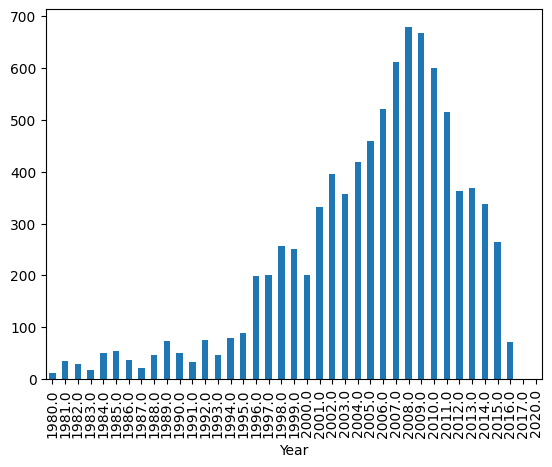

In [96]:
df.groupby('Year')['Global_Sales'].sum().plot( kind='bar', x='Year', y='Global_Sales')